In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
datafile = 'C:\\Users\\Dell\\OneDrive\\Desktop\\DSA\\ML\\CS229_assignments\\EX1\\ex1data1.txt'
cols = np.loadtxt(datafile,delimiter=',',usecols=(0,1),unpack=True) #to read as comma separated data(CSV)

In [ ]:
X = np.transpose(np.array(cols[:-1]))
y = np.transpose(np.array(cols[-1:]))
m = y.size 
X = np.insert(X,0,1,axis=1)

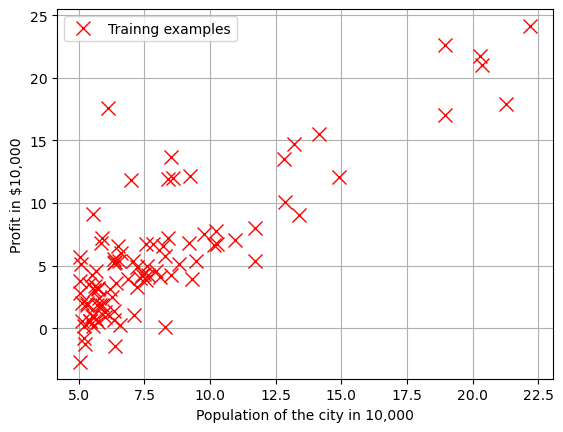

In [53]:
plt.plot(X[:,1],y[:,0],'rx',markersize=10, label = "Trainng examples")
plt.grid(True)
plt.ylabel('Profit in $10,000')
plt.xlabel('Population of the city in 10,000')
plt.legend()

In [54]:
iterations = 1500
alpha = 0.01
def h(theta,X):
    return np.dot(X,theta)

def computeCost(mytheta,X,y):
    return float((1./(2*m)) * np.dot((h(mytheta,X)-y).T,(h(mytheta,X)-y)))
initial_theta = np.zeros((X.shape[1],1))
print(computeCost(initial_theta,X,y))

32.07273387745567


In [55]:
def descendGradient(X, theta_start = np.zeros(2)):
    theta = theta_start
    jvec = []
    thetahistory = []
    for meaninglessvariable in range(iterations):
        tmptheta = theta
        jvec.append(computeCost(theta,X,y))
        thetahistory.append(list(theta[:,0]))

        for j in range(len(tmptheta)):
            tmptheta[j] = theta[j] - (alpha/m)*np.sum((h(theta,X) - y)*np.array(X[:,j]).reshape(m,1))
        theta = tmptheta
    return theta, thetahistory, jvec

In [58]:
initial_theta = np.zeros((X.shape[1],1))
theta, thetahistory, jvec = descendGradient(X,initial_theta)
print("Our hypothesis theta vector is: ")
print(theta)

Our hypothesis theta vector is: 
[[-3.63606348]
 [ 1.16698916]]


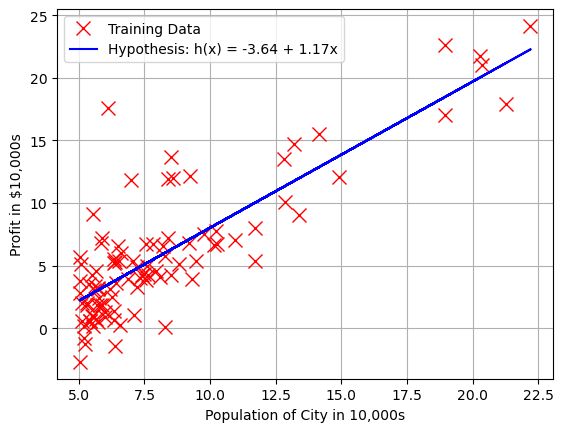

In [59]:
def myfit(xval):
    return theta[0] + theta[1]*xval
plt.plot(X[:,1],y[:,0],'rx',markersize=10,label='Training Data')
plt.plot(X[:,1],myfit(X[:,1]),'b-',label = 'Hypothesis: h(x) = %0.2f + %0.2fx'%(theta[0],theta[1]))
plt.grid(True)
plt.ylabel('Profit in $10,000s')
plt.xlabel('Population of City in 10,000s')
plt.legend()

In [63]:
#Linear Regression in multiple variables:
datafile = 'C:\\Users\\Dell\\OneDrive\\Desktop\\DSA\\ML\\CS229_assignments\\EX1\\ex1data2.txt'
cols = np.loadtxt(datafile,delimiter=',',usecols=(0,1,2),unpack=True) #Read in comma separated data
X = np.transpose(np.array(cols[:-1]))
y = np.transpose(np.array(cols[-1:]))
m = y.size
X = np.insert(X,0,1,axis=1)

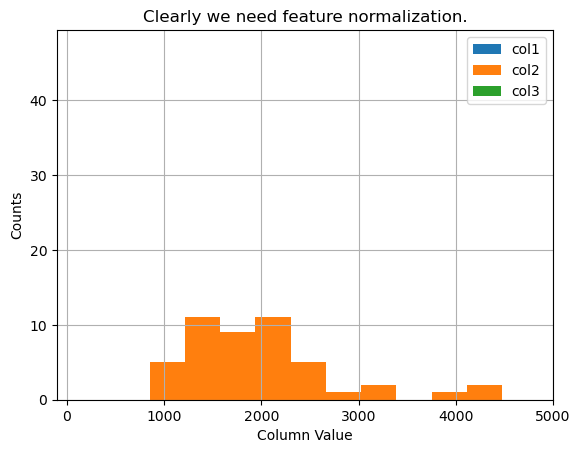

In [64]:
plt.grid(True)
plt.xlim([-100,5000])
dummy = plt.hist(X[:,0],label = 'col1')
dummy = plt.hist(X[:,1],label = 'col2')
dummy = plt.hist(X[:,2],label = 'col3')
plt.title('Clearly we need feature normalization.')
plt.xlabel('Column Value')
plt.ylabel('Counts')
dummy = plt.legend()

In [65]:
stored_feature_means, stored_feature_stds = [], []
Xnorm = X.copy()
for icol in range(Xnorm.shape[1]):
    stored_feature_means.append(np.mean(Xnorm[:,icol]))
    stored_feature_stds.append(np.std(Xnorm[:,icol]))
    #Skip the first column
    if not icol: continue
    Xnorm[:,icol] = (Xnorm[:,icol] - stored_feature_means[-1])/stored_feature_stds[-1]

In [66]:
initial_theta = np.zeros((Xnorm.shape[1],1))
theta, thetahistory, jvec = descendGradient(Xnorm, initial_theta)
print("Our hypothesis theta vector is: ")
print(theta)

Our hypothesis theta vector is: 
[[340412.56301439]
 [109371.67272252]
 [ -6502.3992545 ]]


In [67]:
print("Check of result: What is price of house with 1650 square feet and 3 bedrooms?")
ytest = np.array([1650.,3.])
ytestscaled = [(ytest[x]-stored_feature_means[x+1])/stored_feature_stds[x+1] for x in range(len(ytest))]
ytestscaled.insert(0,1)
print(float(h(theta,ytestscaled)))

Check of result: What is price of house with 1650 square feet and 3 bedrooms?
293098.14924753655
